# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
276091               2020-07-29           2020-07-27            2020-07-16   
276092               2020-07-29           2020-07-27            2020-07-16   
276093               2020-07-29           2020-07-27            2020-07-16   
276094               2020-07-29           2020-07-27            2020-07-16   
276095               2020-07-29           2020-07-27            2020-07-16   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
276091             2020-07-13 00:00:00                   NaT   
276092             2020-07-13 00:00:00                   NaT   
276093             2020-07-13 00:00:00                   NaT   
276094             2020-07-13 00:00:00                   NaT   
276095             2020-07-13 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
276091                    NaT             Montería          Córdoba      Leve   
276092                    NaT             Montería          Córdoba      Leve   
276093                    NaT             Montería          Córdoba      Leve   
276094                    NaT             Montería          Córdoba      Leve   
276095                    NaT             Montería          Córdoba      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
276091            Casa  ...               30 - 40    F               NaN   
276092            Casa  ...               30 - 40    F               NaN   
276093            Casa  ...               40 - 50    F               NaN   
276094            Casa  ...               40 - 50    F               NaN   
276095            Casa  ...               70 - 80    F               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1056   1452
Antioquia                                           12809  16036
Arauca                                                 48    152
Archipiélago de San Andrés Providencia y Santa ...     12     26
Atlántico                                           10228  11564
Barranquilla D.E.                                   13345  15595
Bogotá D.C.                                         46641  48558
Bolívar                                              1101   1311
Boyacá                                                461    468
Buenaventura D.E.                                     768   1316
Caldas                                                407    386
Caquetá                                               401    415
Cartagena D.T. y C.                                  6862   8347
Casanare                                              117    160
Cauca                                                 761    985
Cesar                                                1241   1645
Chocó                                                1340   1591
Cundinamarca                                         3798   3922
Córdoba                                              2480   2552
Guainía                                                 6      8
Guaviare                                               11     74
Huila                                                 379    399
La Guajira                                            974   1046
Magdalena                                             997   1076
Meta                                                  615   1854
Nariño                                               3435   4059
Norte de Santander                                    835   1196
Putumayo                                              345    432
Quindío                                               152    151
Risaralda                                             804    707
Santa Marta D.T. y C.                                1801   1932
Santander                                            1326   1963
Sucre                                                2636   3106
Tolima                                                796   1490
Valle del Cauca                                      9764  11266
Vaupés                                                 27     34
Vichada                                                 1      1

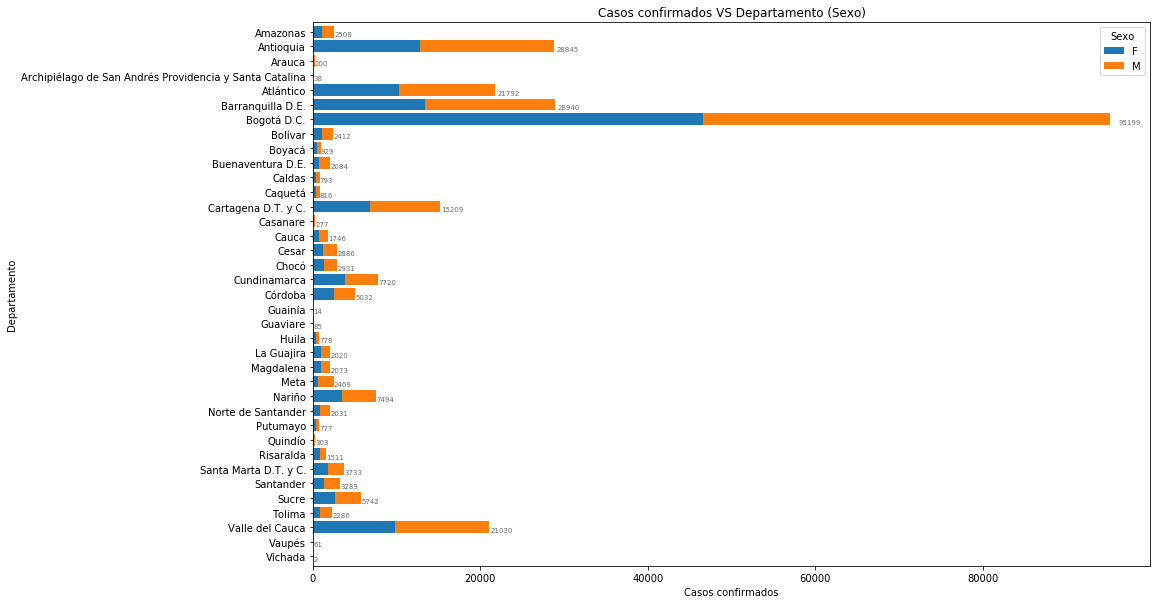

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               133      452      510   
Antioquia                                              948     2014     7621   
Arauca                                                   9       40       74   
Archipiélago de San Andrés Providencia y Santa ...       0        1       10   
Atlántico                                              955     1650     4725   
Barranquilla D.E.                                     1113     1876     6326   
Bogotá D.C.                                           4169     7295    21746   
Bolívar                                                117      224      530   
Boyacá                                                  52       78      199   
Buenaventura D.E.                                       45      280      473   
Caldas                                                  29       48      184   
Caquetá                                                 25       51      241   
Cartagena D.T. y C.                                    669     1118     3474   
Casanare                                                13       15       85   
Cauca                                                   85      155      422   
Cesar                                                  188      263      707   
Chocó                                                  123      256      682   
Cundinamarca                                           375      572     1786   
Córdoba                                                163      248     1017   
Guainía                                                  0        2        4   
Guaviare                                                 1       30       19   
Huila                                                   49       76      156   
La Guajira                                             109      202      439   
Magdalena                                              108      148      385   
Meta                                                    43      217      774   
Nariño                                                 348      650     1744   
Norte de Santander                                      63       82      477   
Putumayo                                                21       57      225   
Quindío                                                 11       18       59   
Risaralda                                               92      137      332   
Santa Marta D.T. y C.                                  145      256      821   
Santander                                              120      233      774   
Sucre                                                  229      455     1193   
Tolima                                                 100      135      716   
Valle del Cauca                                        709     1435     4792   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                481      341      274   
Antioquia                                              7257     4521     3393   
Arauca                                                   50       13        6   
Archipiélago de San Andrés Providencia y Santa ...       11        9        4   
Atlántico                                              5076     3457     2839   
Barranquilla D.E.                                      6871     4501     3893   
Bogotá D.C.                                           20912    15375    12926   
Bolívar                                                 554      357      222   
Boyacá                                                  183      143 

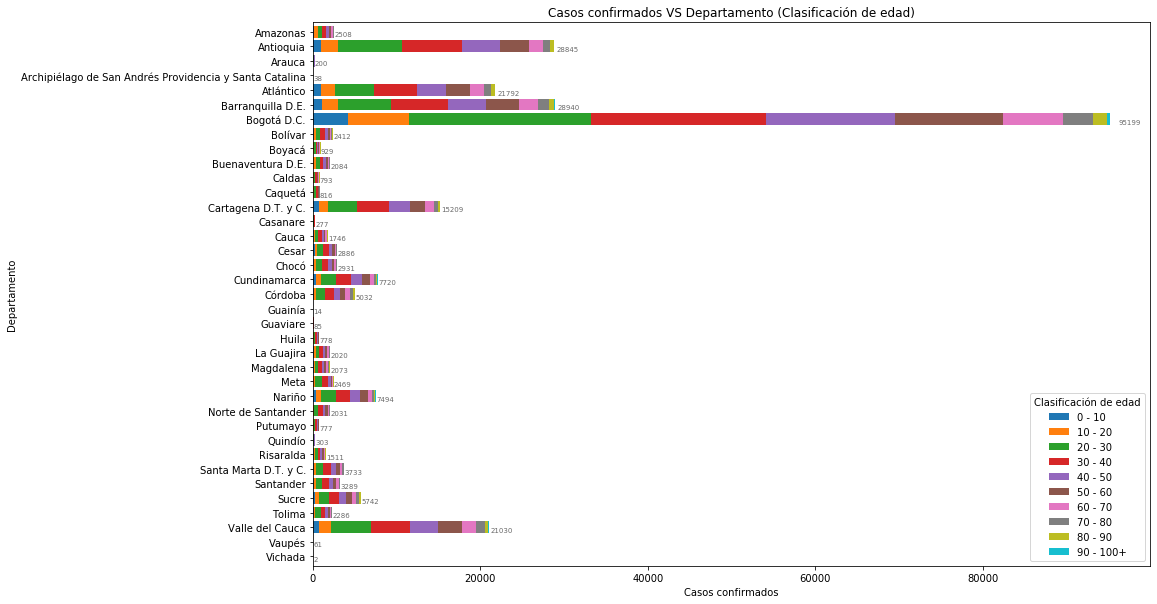

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               77.0      102.0   
Antioquia                                           18295.0      429.0   
Arauca                                                 53.0        1.0   
Archipiélago de San Andrés Providencia y Santa ...      6.0        0.0   
Atlántico                                            4945.0     1027.0   
Barranquilla D.E.                                    5817.0     1448.0   
Bogotá D.C.                                         44646.0     2517.0   
Bolívar                                               862.0      111.0   
Boyacá                                                374.0       27.0   
Buenaventura D.E.                                     272.0      138.0   
Caldas                                                461.0       10.0   
Caquetá                                               601.0       16.0   
Cartagena D.T. y C.                                  3018.0      460.0   
Casanare                                              133.0        4.0   
Cauca                                                 757.0       57.0   
Cesar                                                1130.0       61.0   
Chocó                                                 576.0      100.0   
Cundinamarca                                         2921.0      198.0   
Córdoba                                              2201.0      600.0   
Guainía                                                 0.0        1.0   
Guaviare                                               35.0        0.0   
Huila                                                 309.0       20.0   
La Guajira                                            779.0      112.0   
Magdalena                                             500.0      196.0   
Meta                                                  728.0       30.0   
Nariño                                               2624.0      235.0   
Norte de Santander                                   1259.0       87.0   
Putumayo                                              577.0       28.0   
Quindío                                                83.0        8.0   
Risaralda                                             720.0       26.0   
Santa Marta D.T. y C.                                1369.0      142.0   
Santander                                            1667.0       79.0   
Sucre                                                2089.0      356.0   
Tolima                                                808.0       47.0   
Valle del Cauca                                      6966.0      780.0   
Vaupés                                                  9.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                 8.0           4.0   
Antioquia                                             1213.0         167.0   
Arauca                                                  10.0           3.0   
Archipiélago de San Andrés Providencia y Santa ...       1.0           1.0   
Atlántico                                              720.0         100.0   
Barranquilla D.E.                                      863.0          98.0   
Bogotá D.C.                                           5386.0         326.0   
Bolívar                                                125.0          10.0   
Boyacá                                                  59.0           6.0   
Buenaventura D.E.                                      117.0          28.0   
Caldas                                                  27.0           8.0   
Caquetá                                                 66.0           4.0   
Cartagena D.T. y C.  

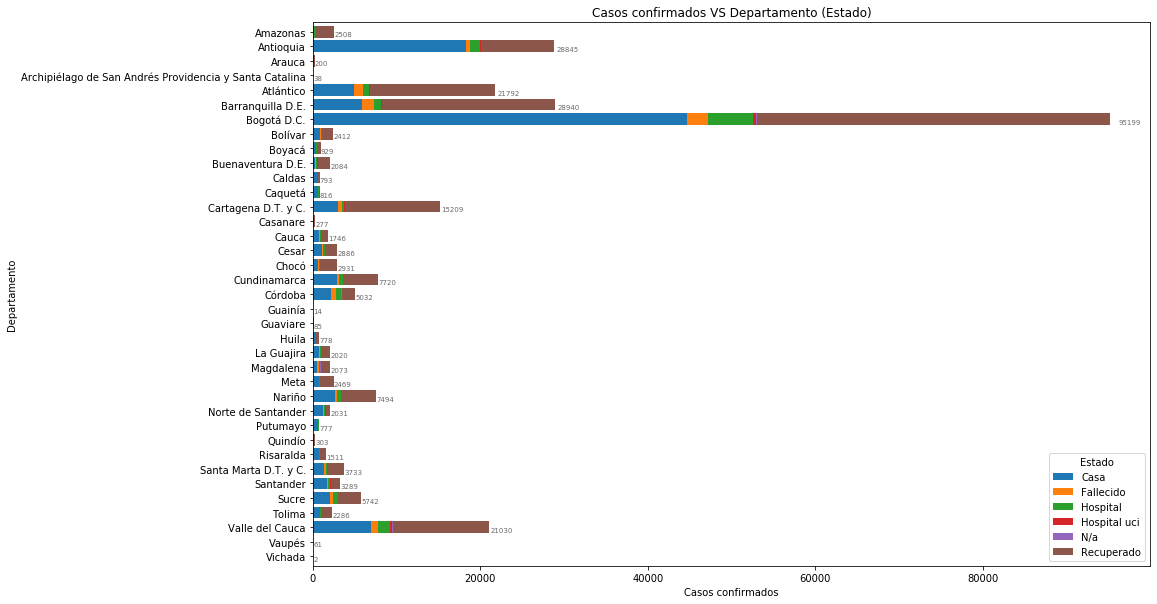

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          51422  56245
Fallecido      3447   6007
Hospital       5959   8065
Hospital uci    545   1022
N/a             247    319
Recuperado    67160  75617

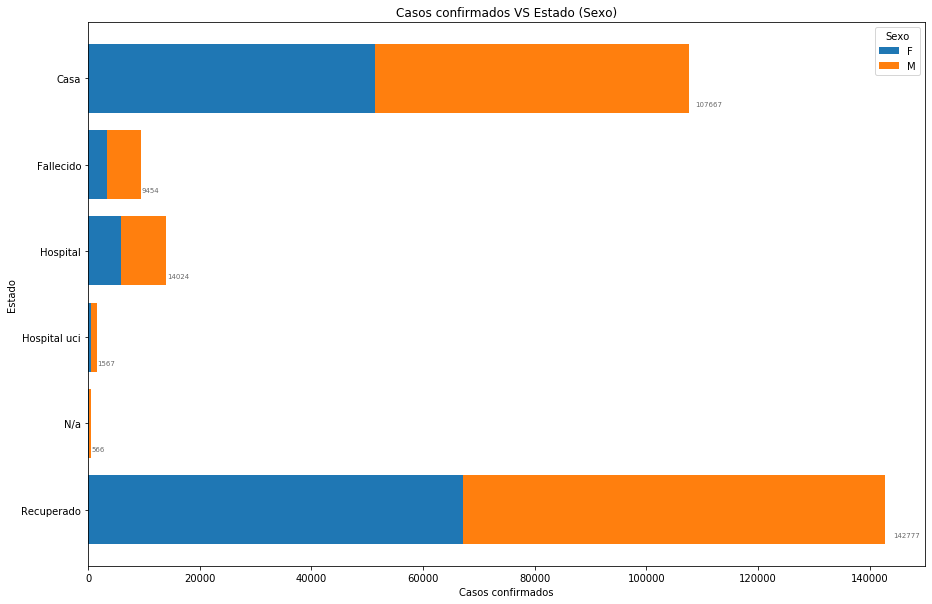

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     4168     8318    26838    26606    17676    13350   
Fallecido                  18       19      138      328      755     1438   
Hospital                  544      289     1050     1636     2218     3006   
Hospital uci               67       26       57      166      224      371   
N/a                        16       13       26       24       46       68   
Recuperado               6550    12110    35632    34880    22503    17052   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      6440     2873     1191        207  
Fallecido                 2217     2375     1752        414  
Hospital                  2643     1701      831        106  
Hospital uci               363      218       71          4  
N/a                        107      123      111         32  
Recuperado                8608     3740     1462        240

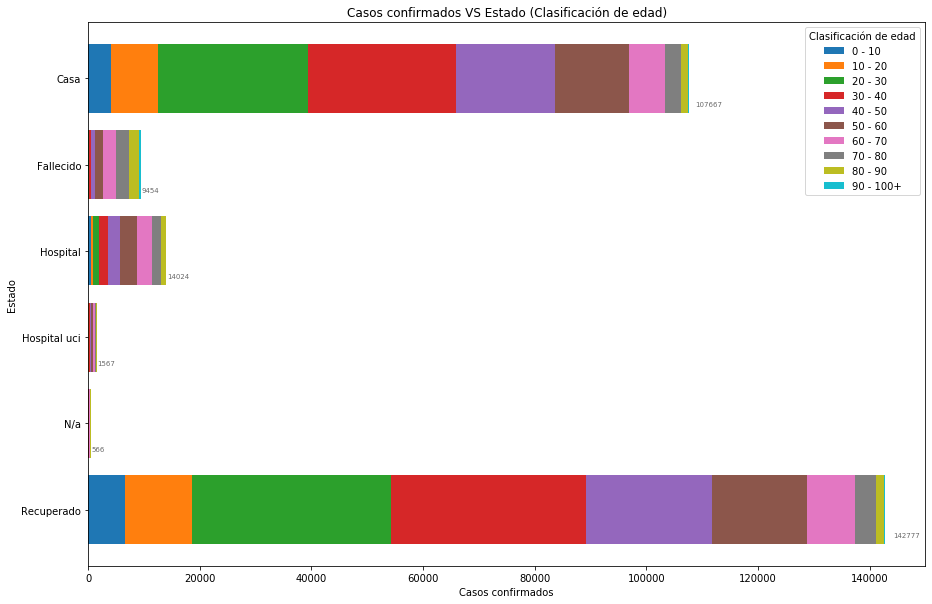

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   122354  133032
Importado       455     520
Relacionado    5971   13723

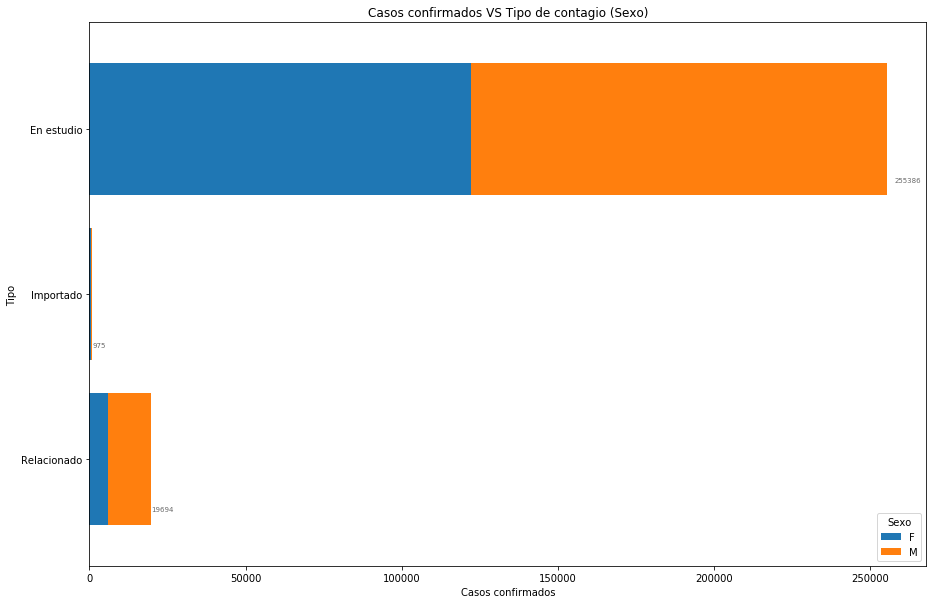

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio              10501    18343    58076    58657    40634    33253   
Importado                   6       37      240      230      173      150   
Relacionado               856     2395     5425     4753     2615     1882   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               19320    10527     5136        939  
Importado                   94       35        9          1  
Relacionado                964      468      273         63

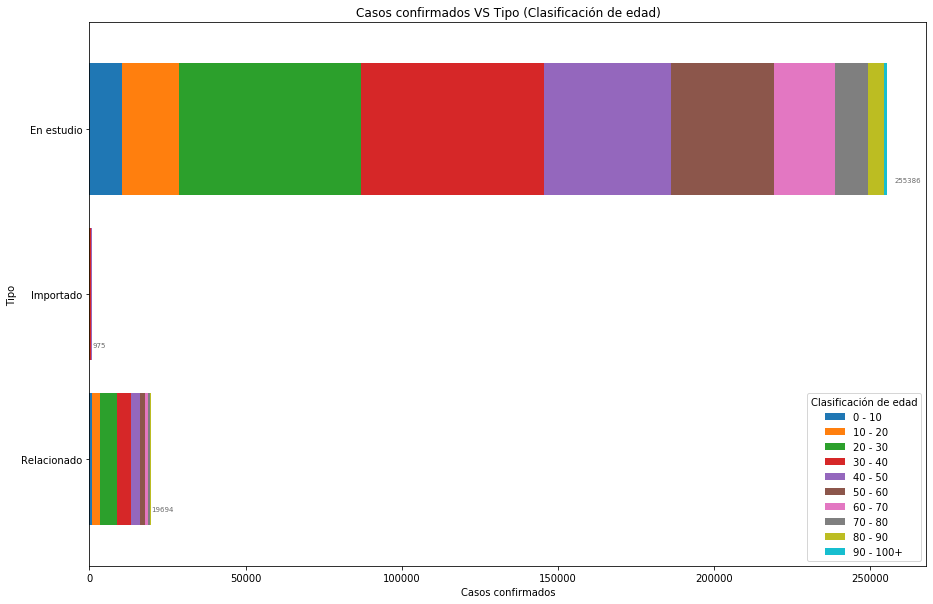

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  5615   5748
10 - 20                 9545  11230
20 - 30                30254  33487
30 - 40                29153  34487
40 - 50                20303  23119
50 - 60                16340  18945
60 - 70                 9344  11034
70 - 80                 4994   6036
80 - 90                 2659   2759
90 - 100+                573    430

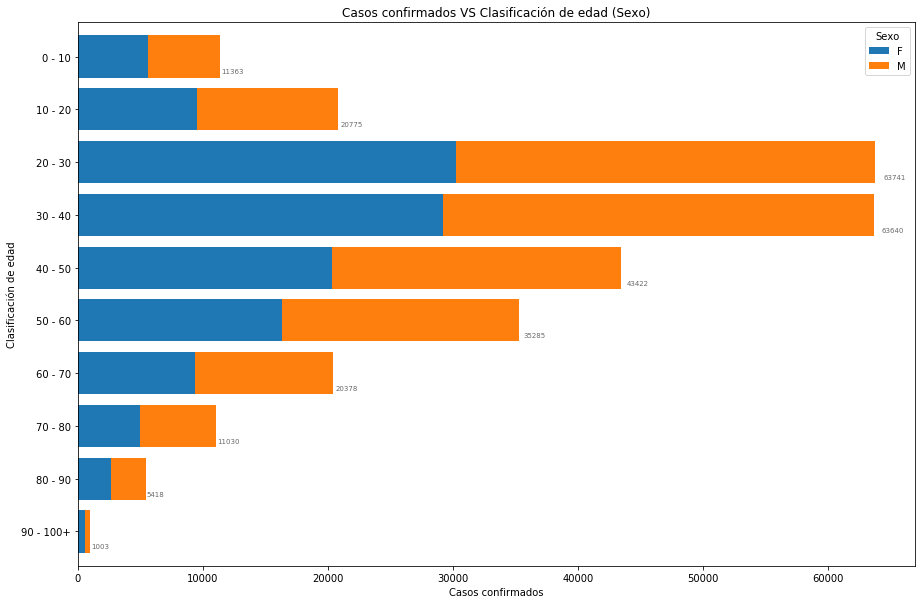

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  4168         18       544            67   16   
10 - 20                 8318         19       289            26   13   
20 - 30                26838        138      1050            57   26   
30 - 40                26606        328      1636           166   24   
40 - 50                17676        755      2218           224   46   
50 - 60                13350       1438      3006           371   68   
60 - 70                 6440       2217      2643           363  107   
70 - 80                 2873       2375      1701           218  123   
80 - 90                 1191       1752       831            71  111   
90 - 100+                207        414       106             4   32   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       6550  
10 - 20                     12110  
20 - 30                     35632  
30 - 40                     34880  
40 - 50                     22503  
50 - 60                     17052  
60 - 70                      8608  
70 - 80                      3740  
80 - 90                      1462  
90 - 100+                     240

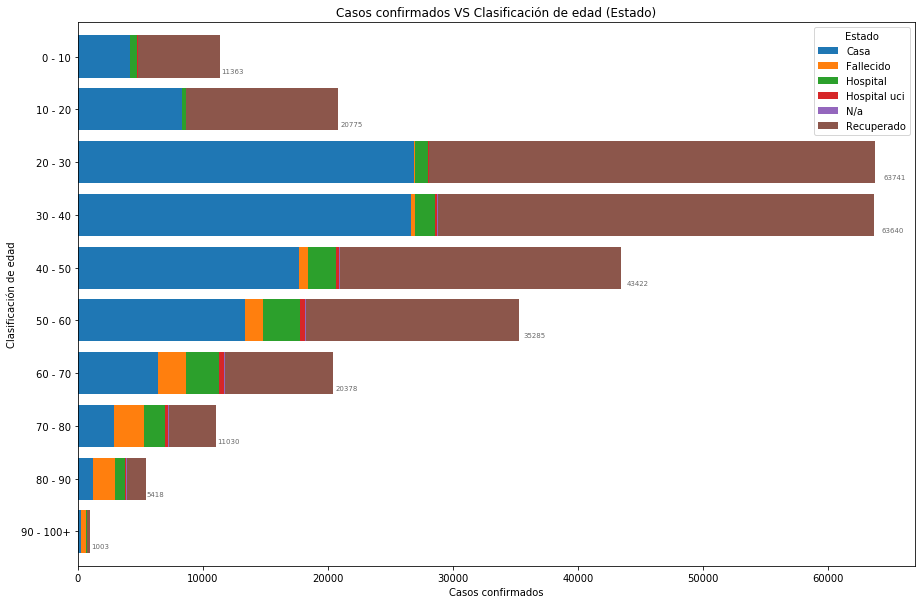

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-25            3172.0  3131.0
2020-07-26            1726.0  1845.0
2020-07-27            3435.0  3763.0
2020-07-28            5409.0  5780.0
2020-07-29              93.0   105.0

[143 rows x 2 columns]

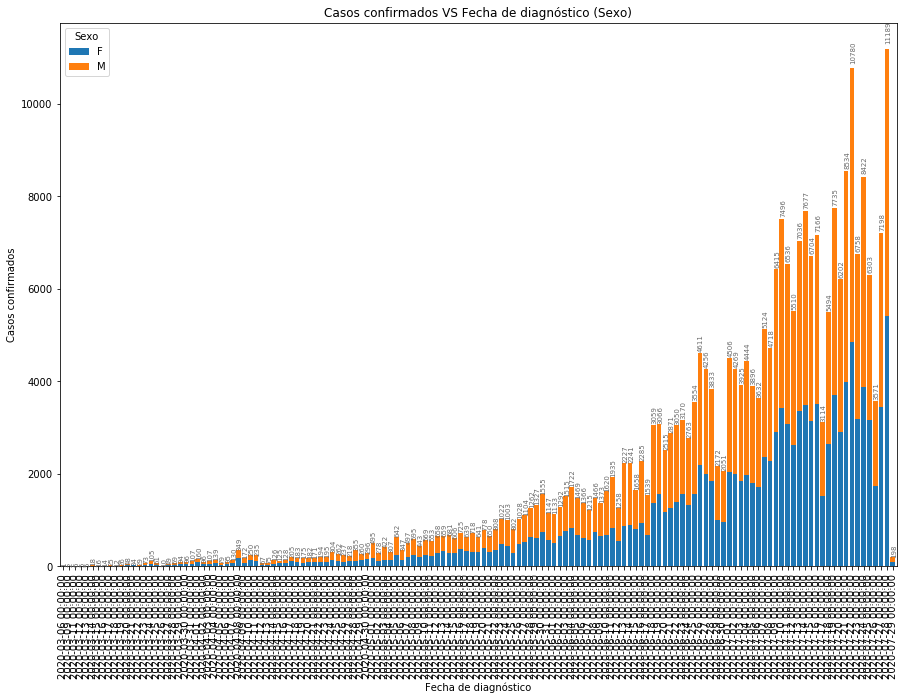

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-25                234      410     1423     1480     1026      844   
2020-07-26                130      220      806      837      569      456   
2020-07-27                231      507     1685     1705     1190      868   
2020-07-28                460      854     2545     2499     1763     1519   
2020-07-29                  3       12       39       58       38       25   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-25                 464      269      129         24  
2020-07-26                 267      180       95         11  
2020-07-27                 540      274      162         36  
2020-07-28                 812      468      221         48  
2020-07-29                  13        7        3          0  

[143 rows x 10 columns]

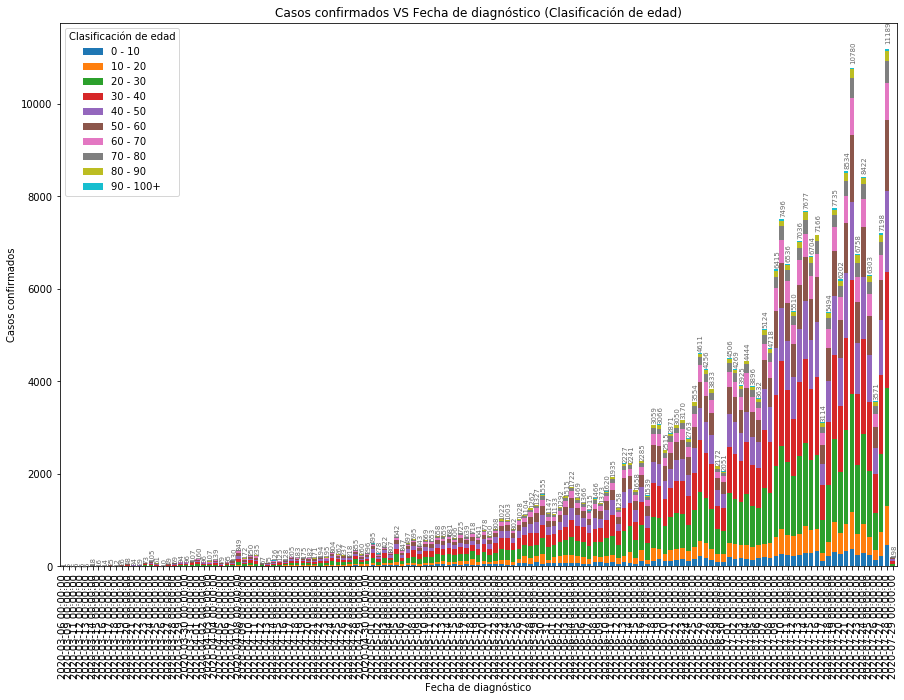

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                   Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                    
2020-03-06                0.0        0.0       0.0           0.0  0.0   
2020-03-09                0.0        0.0       0.0           0.0  0.0   
2020-03-11                0.0        0.0       0.0           0.0  0.0   
2020-03-12                0.0        0.0       0.0           0.0  0.0   
2020-03-13                0.0        0.0       0.0           0.0  0.0   
...                       ...        ...       ...           ...  ...   
2020-07-25             5653.0      121.0     446.0          36.0  6.0   
2020-07-26             3165.0      100.0     273.0          29.0  2.0   
2020-07-27             6373.0      110.0     404.0          35.0  4.0   
2020-07-28            10015.0       77.0     792.0          45.0  3.0   
2020-07-29              181.0        0.0      16.0           1.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-25                  41.0  
2020-07-26                   2.0  
2020-07-27                 272.0  
2020-07-28                 257.0  
2020-07-29                   0.0  

[143 rows x 6 columns]

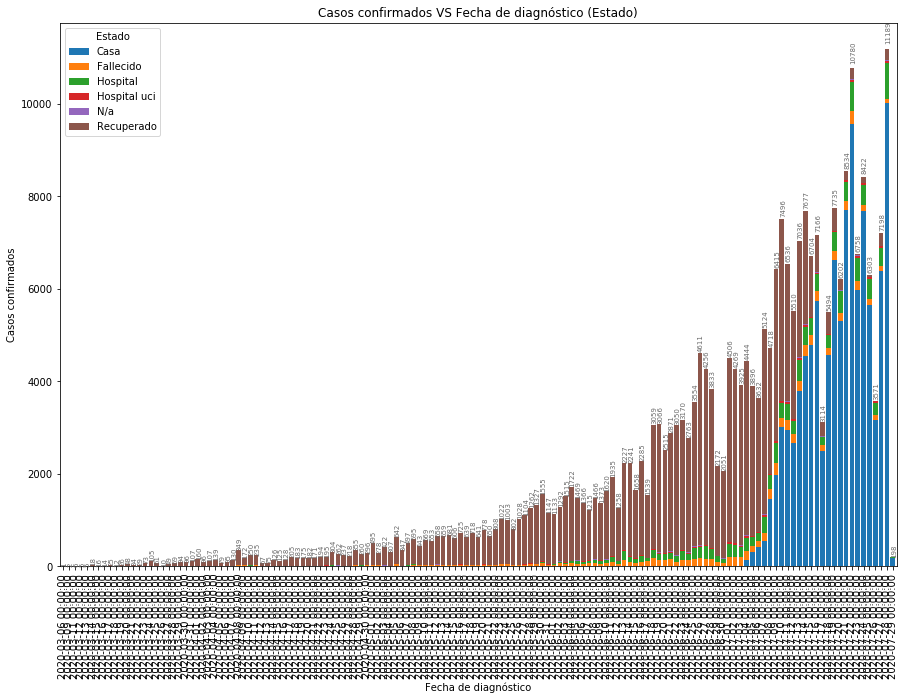

In [39]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-07-25            116338.0  133779.0
2020-07-26            118064.0  135624.0
2020-07-27            121499.0  139387.0
2020-07-28            126908.0  145167.0
2020-07-29            127001.0  145272.0

[143 rows x 2 columns]

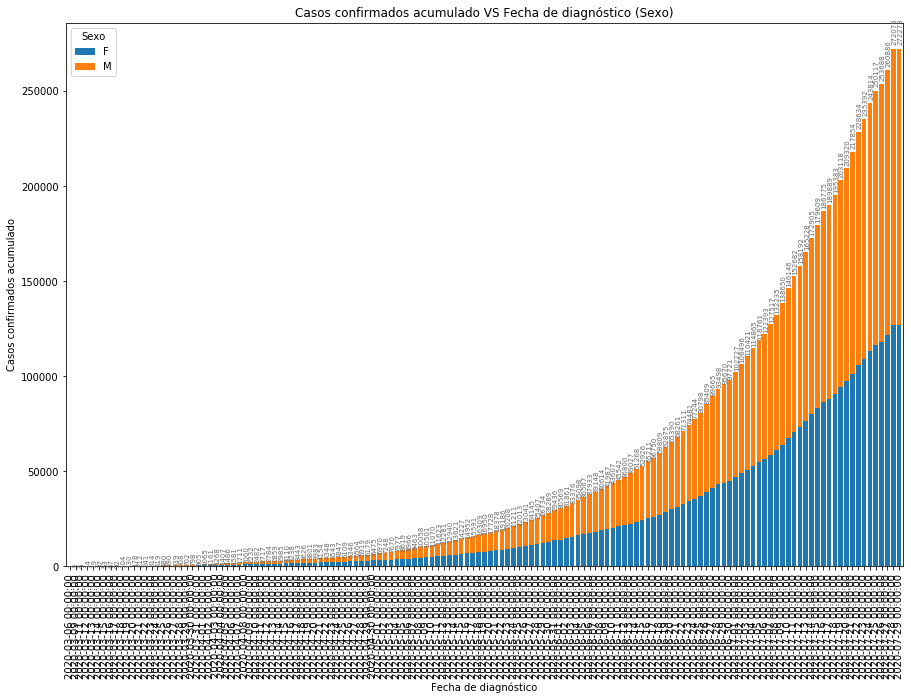

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-25              10406    18906    57762    57633    39307    31955   
2020-07-26              10536    19126    58568    58470    39876    32411   
2020-07-27              10767    19633    60253    60175    41066    33279   
2020-07-28              11227    20487    62798    62674    42829    34798   
2020-07-29              11230    20499    62837    62732    42867    34823   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-25               18455     9942     4853        898  
2020-07-26               18722    10122     4948        909  
2020-07-27               19262    10396     5110        945  
2020-07-28               20074    10864     5331        993  
2020-07-29               20087    10871     5334        993  

[143 rows x 10 columns]

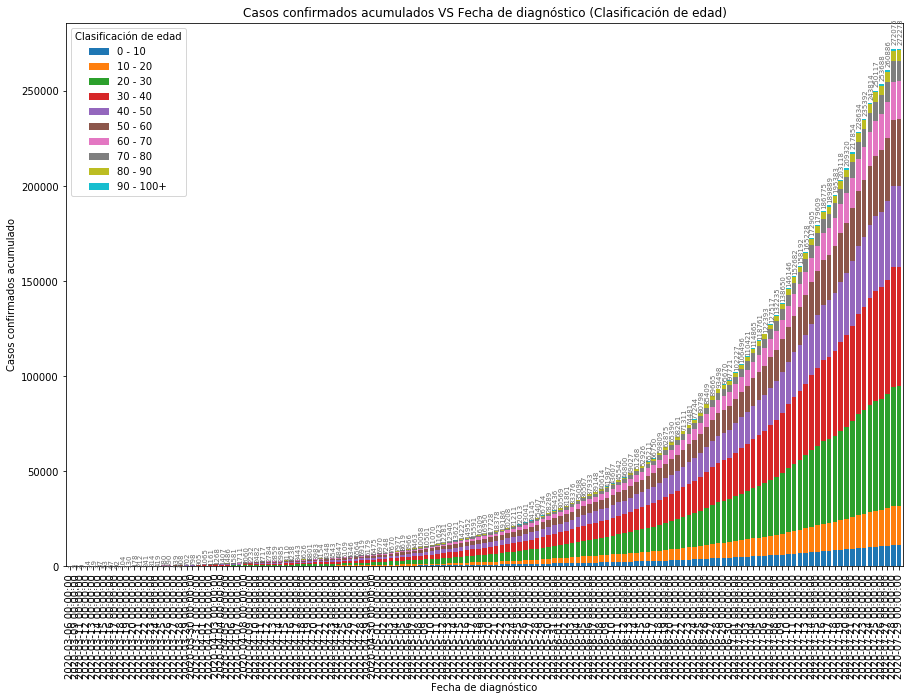

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-07-25             87896.0     8981.0   12394.0        1427.0  538.0   
2020-07-26             91061.0     9081.0   12667.0        1456.0  540.0   
2020-07-27             97434.0     9191.0   13071.0        1491.0  544.0   
2020-07-28            107449.0     9268.0   13863.0        1536.0  547.0   
2020-07-29            107630.0     9268.0   13879.0        1537.0  547.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-25              138881.0  
2020-07-26              138883.0  
2020-07-27              139155.0  
2020-07-28              139412.0  
2020-07-29              139412.0  

[143 rows x 6 columns]

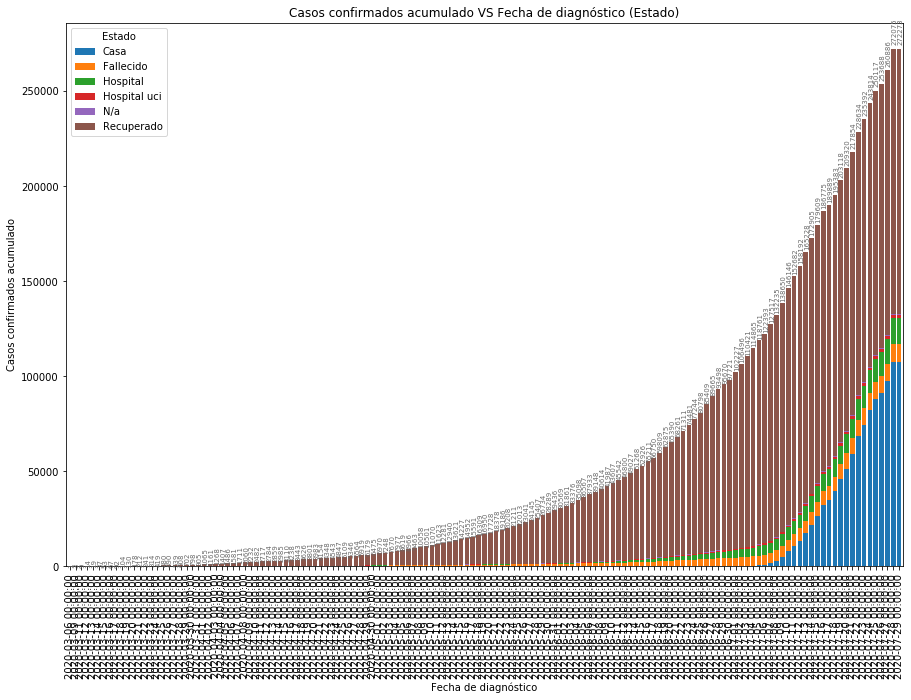

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>